# Volume Mesh Builder Benchmarks

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
benchmarks_csv_path = 'dtcc_runs_results.csv'
df = pd.read_csv(benchmarks_csv_path)

In [3]:
labels = { 2: 'Layer Ground Mesh',
          3: ' Elastic Smoothing 1',
          4: ' Trim Volume Mesh',
          5: ' Elastic Smoothing 2',
          6: ' Mesh Improvement Step',
          7: ' Domain Padding'}

## 1. CPU Time for each generation step as a function of cell number.

Computational cost (CPU time) as function of the number of cells (tetrahedra) generated for the different steps of our mesh generation pipeline

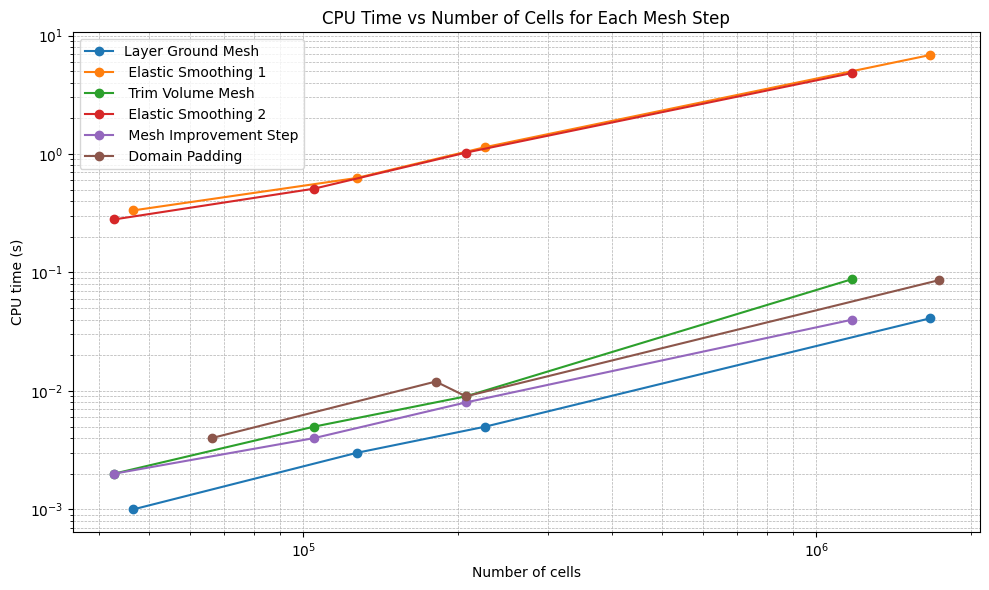

In [4]:
time_cols = [col for col in df.columns if col.startswith('time_s_')]
steps = sorted(int(re.search(r'time_s_(\d+)', col).group(1)) for col in time_cols)

# Plot CPU time vs cells for each step
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
for step in steps:
    time_col = f'time_s_{step}'
    cells_col = f'cells_{step}'
    ax.loglog(df[cells_col], df[time_col], marker='o', label=labels[step])

ax.set_xlabel('Number of cells')
ax.set_ylabel('CPU time (s)')
ax.set_title('CPU Time vs Number of Cells for Each Mesh Step')
ax.grid(True, which="both", ls="--", linewidth=0.5)

ax.legend(loc='best')
plt.tight_layout()
plt.show()